## **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## **When running in Google Colab**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#cd'/content/drive/MyDrive/Colab Notebooks'

## **Importing Dataset**

In [4]:
#jupyter notebook
data = pd.read_excel("CSE 4108 Data for Used Car Price Predction.xlsx")

In [5]:
#for colab
#data = pd.read_excel("used_car_data.xlsx")

In [6]:
data.head()

,Brand,Model,MPG,Engine Type,Drive Type,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price
0,Honda,Accord Hybrid Touring,48 city / 48 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",8,212,2019,White,5,37998
1,Honda,Accord Hybrid EX-L,50 city / 45 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",93,195,2015,Gray,5,21998
2,Honda,Accord Hybrid EX-L,49 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",36,212,2017,silver,5,28998
3,Honda,Accord Hybrid,48 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",29,212,2020,Gray,5,29998
4,Honda,Accord Hybrid Touring,48 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",16,212,2020,White,5,36998


In [7]:
data.columns

Index(['Brand', 'Model', 'MPG', 'Engine Type', 'Drive Type', 'Milleage',
       'horsepower', 'year', 'Exterior Color', 'Passenger Capacity', 'Price'],
      dtype='object')

In [8]:
data.describe()

,Milleage,horsepower,year,Passenger Capacity,Price
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,41.299539,222.490783,2017.698157,5.391705,31646.850230
std,29.843126,66.340859,2.696957,0.900872,9439.757983
min,1.000000,95.000000,2010.000000,5.000000,13998.000000
25%,19.000000,176.000000,2016.000000,5.000000,23998.000000
50%,35.000000,212.000000,2018.000000,5.000000,29998.000000
75%,56.750000,278.000000,2020.000000,5.000000,38998.000000
max,128.000000,381.000000,2022.000000,8.000000,67998.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               434 non-null    object
 1   Model               434 non-null    object
 2   MPG                 434 non-null    object
 3   Engine Type         434 non-null    object
 4   Drive Type          434 non-null    object
 5   Milleage            434 non-null    int64 
 6   horsepower          434 non-null    int64 
 7   year                434 non-null    int64 
 8   Exterior Color      434 non-null    object
 9   Passenger Capacity  434 non-null    int64 
 10  Price               434 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 37.4+ KB


# **Data Visualization**

## Correlations with Price

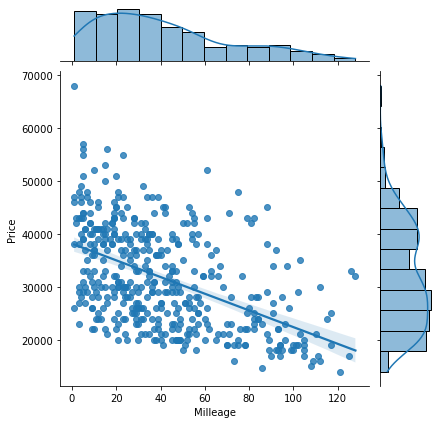

In [10]:
sns.jointplot(x='Milleage',y='Price',data=data,kind='reg')

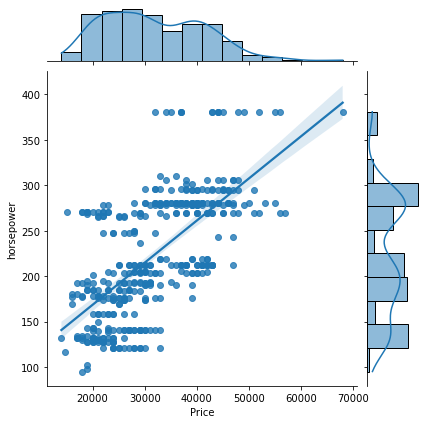

In [11]:
sns.jointplot(x='Price',y='horsepower',data=data,kind='reg')

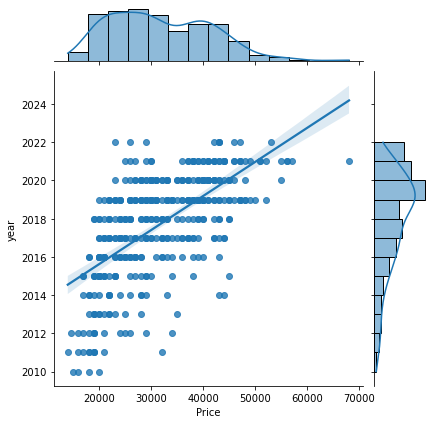

In [12]:
sns.jointplot(x='Price',y='year',data=data,kind='reg')

<AxesSubplot:xlabel='Exterior Color', ylabel='Price'>

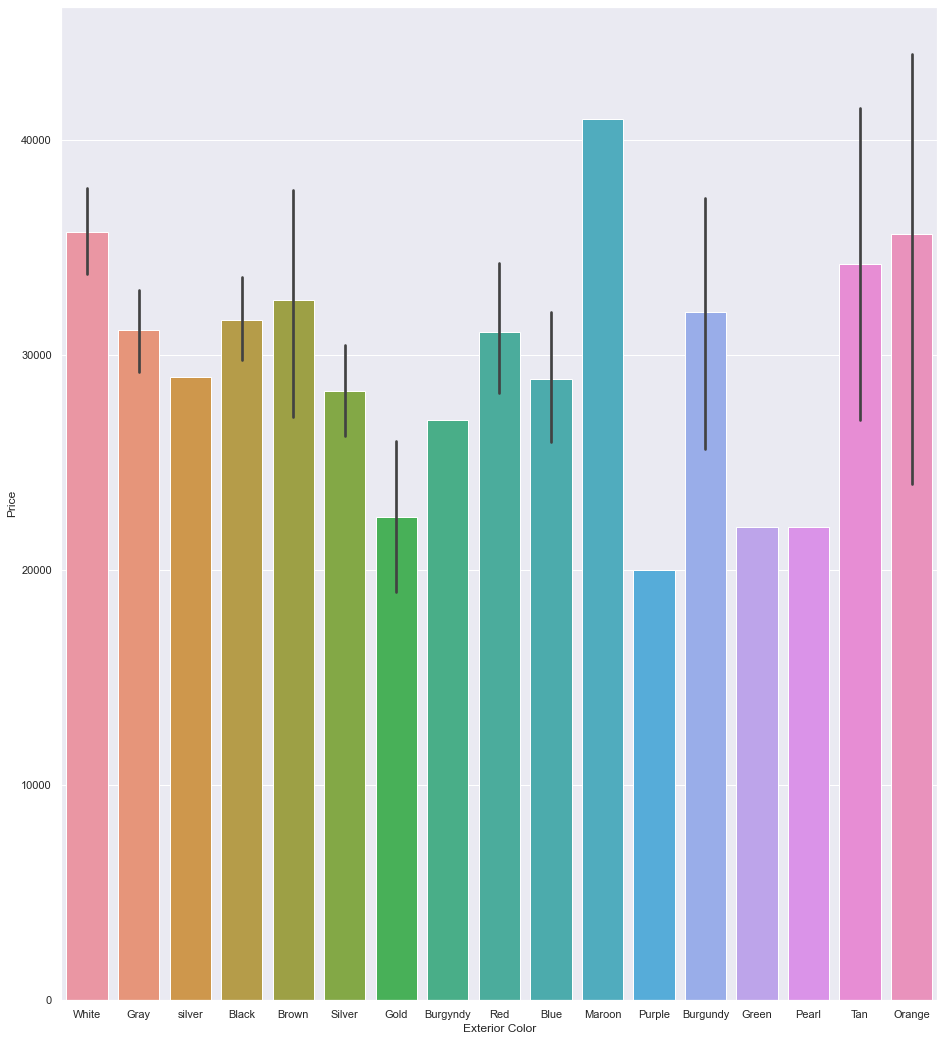

In [13]:
sns.set(rc={'figure.figsize':(15.7,18.27)})
sns.barplot(x='Exterior Color', y = 'Price', data=data)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

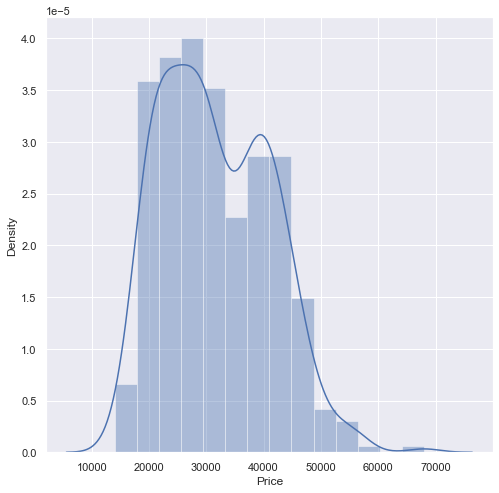

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(data['Price'])

## Toyota Vs Honda

In [15]:
df_toyota = data[data['Brand'] == 'Toyota']

In [16]:
df_honda = data[data['Brand'] == 'Honda']

<AxesSubplot:xlabel='year', ylabel='Price'>

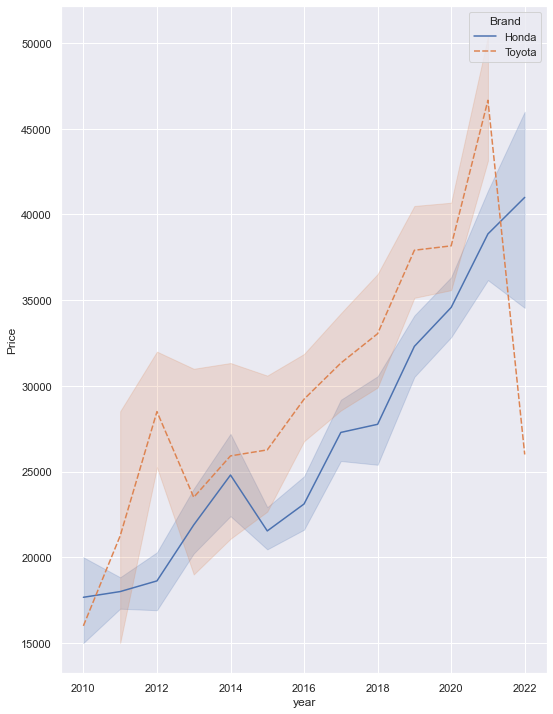

In [17]:
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.lineplot(data=data, x="year", y="Price", hue='Brand', style='Brand')

<AxesSubplot:xlabel='year', ylabel='Milleage'>

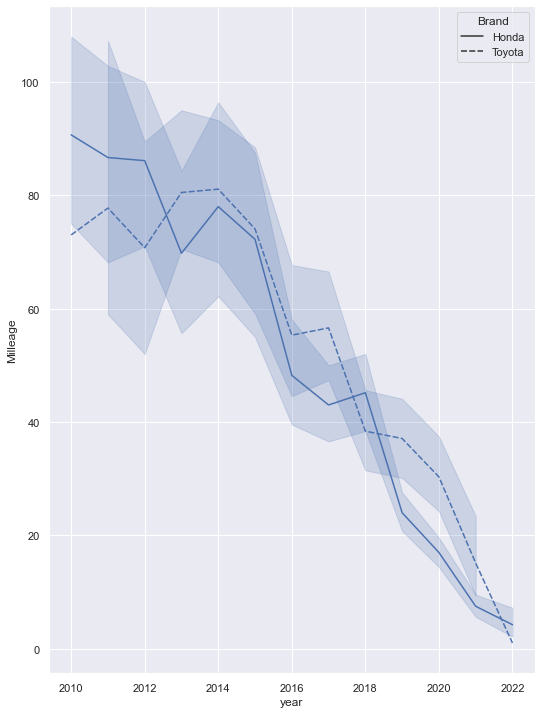

In [18]:
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.lineplot(data=data, x="year", y="Milleage", style='Brand')

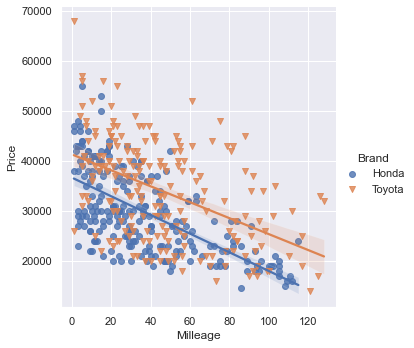

In [19]:
sns.lmplot(y='Price', x='Milleage', data=data, hue='Brand',markers=['o','v'])

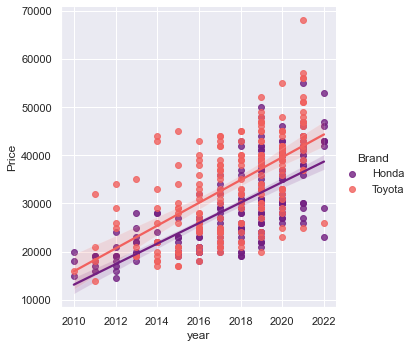

In [20]:
sns.lmplot(y='Price', x='year', data=data, hue='Brand', palette='magma')

<AxesSubplot:xlabel='year', ylabel='Price'>

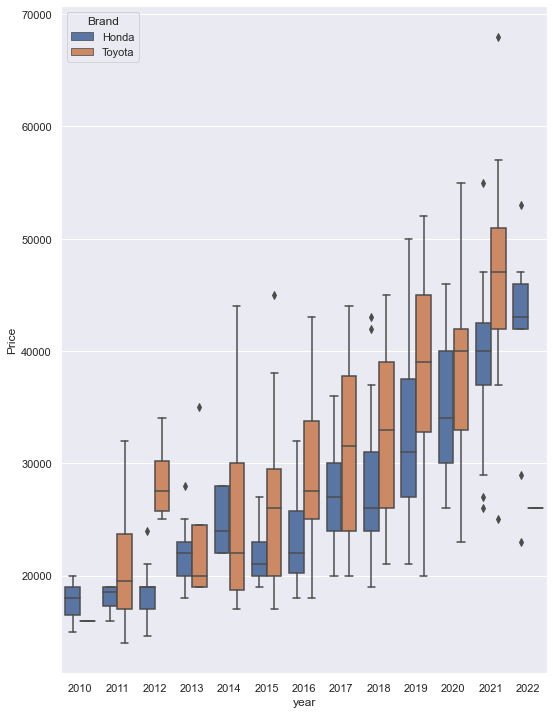

In [21]:
sns.boxplot(x='year', y='Price', data=data, hue='Brand')

# Data Preprocesssing

In [22]:
data1 = data.copy()

In [23]:
data1['Drive Type'].value_counts()

2WD, Front Wheel Drive       227
4WD/AWD, All Wheel Drive      75
4WD/AWD, Four Wheel Drive     55
4WD/AWD, All Wheel            54
2WD, Rear Wheel Drive         11
4WD                            6
2WD                            5
4WD/AWD, 4-Wheel Drive         1
Name: Drive Type, dtype: int64

In [24]:
data1['Engine Type'].value_counts()

6-cyl, Gas, 3.5L          137
4-cyl, Gas, 1.8L           43
4-cyl, Hybrid, 2.0L        40
4-cyl, Gas, 2.5L           37
4-cyl, Turbo Gas, 1.5L     35
4-cyl, Gas, 2.4L           26
4-cyl, Gas, 1.5L           20
6-cyl, Gas, 4.0L           20
4-cyl, Hybrid, 1.8L        20
8-cyl, Gas, 5.7L           18
4-cyl, Hybrid, 2.5L        14
4-cyl, Gas, 2.0L           13
6-cyl, Hybrid, 3.5L         6
4-cyl, Turbo Gas, 2.0L      3
8-cyl, Gas, 4.6L            2
Name: Engine Type, dtype: int64

## Generating new features from existing ones

In [25]:
data1[['No. of Axle','Axle Type']] = data1['Drive Type'].str.split(',', 1, expand=True)
data1[['Cylinder','Engine Type2']] = data1['Engine Type'].str.split(',', 1, expand=True)
data1[['Gas Type','Litres']] = data1['Engine Type2'].str.split(',', 1, expand=True)
data1[['MPG1','MPG2']] = data1['MPG'].str.split('/', 1, expand=True)
data1['MPG1'] = data1['MPG1'].str.replace("\scity", "")
data1['MPG2'] = data1['MPG2'].str.replace("\shwy", "")
data1.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_10500/1433163853.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['MPG1'] = data1['MPG1'].str.replace("\scity", "")
C:\Users\USER\AppData\Local\Temp/ipykernel_10500/1433163853.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['MPG2'] = data1['MPG2'].str.replace("\shwy", "")


,Brand,Model,MPG,Engine Type,Drive Type,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Engine Type2,Gas Type,Litres,MPG1,MPG2
0,Honda,Accord Hybrid Touring,48 city / 48 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",8,212,2019,White,5,37998,2WD,Front Wheel Drive,4-cyl,"Hybrid, 2.0L",Hybrid,2.0L,48,48
1,Honda,Accord Hybrid EX-L,50 city / 45 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",93,195,2015,Gray,5,21998,2WD,Front Wheel Drive,4-cyl,"Hybrid, 2.0L",Hybrid,2.0L,50,45
2,Honda,Accord Hybrid EX-L,49 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",36,212,2017,silver,5,28998,2WD,Front Wheel Drive,4-cyl,"Hybrid, 2.0L",Hybrid,2.0L,49,47
3,Honda,Accord Hybrid,48 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",29,212,2020,Gray,5,29998,2WD,Front Wheel Drive,4-cyl,"Hybrid, 2.0L",Hybrid,2.0L,48,47
4,Honda,Accord Hybrid Touring,48 city / 47 hwy,"4-cyl, Hybrid, 2.0L","2WD, Front Wheel Drive",16,212,2020,White,5,36998,2WD,Front Wheel Drive,4-cyl,"Hybrid, 2.0L",Hybrid,2.0L,48,47


In [26]:
data2 = data1.copy()

In [27]:
data2.columns

Index(['Brand', 'Model', 'MPG', 'Engine Type', 'Drive Type', 'Milleage',
       'horsepower', 'year', 'Exterior Color', 'Passenger Capacity', 'Price',
       'No. of Axle', 'Axle Type', 'Cylinder', 'Engine Type2', 'Gas Type',
       'Litres', 'MPG1', 'MPG2'],
      dtype='object')

In [28]:
data2.drop(['Engine Type','Engine Type2','Drive Type','MPG'],axis=1, inplace=True)

## Mapping

In [29]:
data2.columns

Index(['Brand', 'Model', 'Milleage', 'horsepower', 'year', 'Exterior Color',
       'Passenger Capacity', 'Price', 'No. of Axle', 'Axle Type', 'Cylinder',
       'Gas Type', 'Litres', 'MPG1', 'MPG2'],
      dtype='object')

In [30]:
data2['year'].value_counts()

2019    91
2020    67
2017    51
2018    46
2021    44
2016    40
2015    28
2014    17
2013    13
2012    13
2022    10
2011    10
2010     4
Name: year, dtype: int64

In [31]:
data2['year'] = data2['year'] - 2000

In [32]:
data2['year'].value_counts()

19    91
20    67
17    51
18    46
21    44
16    40
15    28
14    17
13    13
12    13
22    10
11    10
10     4
Name: year, dtype: int64

In [33]:
data2['Litres'].value_counts()

 3.5L    143
 1.8L     63
 2.0L     56
 1.5L     55
 2.5L     51
 2.4L     26
 4.0L     20
 5.7L     18
 4.6L      2
Name: Litres, dtype: int64

In [34]:
data2['Litres'] = data2['Litres'].map(lambda x: x.rstrip('L'))
data2['Litres'].value_counts()

 3.5    143
 1.8     63
 2.0     56
 1.5     55
 2.5     51
 2.4     26
 4.0     20
 5.7     18
 4.6      2
Name: Litres, dtype: int64

In [35]:
data2['Gas Type'].value_counts()

 Gas          316
 Hybrid        80
 Turbo Gas     38
Name: Gas Type, dtype: int64

In [36]:
def impute_gas_type(cols):
    if cols == ' Hybrid':
        return 2
    elif cols == ' Turbo Gas':
        return 1
    elif cols == ' Gas':
        return 0

In [37]:
data2['Gas Type'] = data2['Gas Type'].apply(impute_gas_type)

In [38]:
data2['Gas Type'].value_counts()

0    316
2     80
1     38
Name: Gas Type, dtype: int64

In [39]:
data2['Cylinder'].value_counts()

4-cyl    251
6-cyl    163
8-cyl     20
Name: Cylinder, dtype: int64

In [40]:
data2['Cylinder'] = data2['Cylinder'].map(lambda x: x.rstrip('-cyl'))
data2['Cylinder'].value_counts()

4    251
6    163
8     20
Name: Cylinder, dtype: int64

In [41]:
data2['No. of Axle'].value_counts()

2WD        243
4WD/AWD    185
4WD          6
Name: No. of Axle, dtype: int64

In [42]:
data2['No. of Axle'] = data2['No. of Axle'].map(lambda x: x.rstrip('/AWD'))
data2['No. of Axle'].value_counts()

2    243
4    191
Name: No. of Axle, dtype: int64

In [43]:
data2['Axle Type'].value_counts()

 Front Wheel Drive    227
 All Wheel Drive       75
 Four Wheel Drive      55
 All Wheel             54
 Rear Wheel Drive      11
 4-Wheel Drive          1
Name: Axle Type, dtype: int64

In [44]:
def impute_drive_type_2(cols):    #front wheel drive are least expensive, FWD is most expensive
    if cols == ' Front Wheel Drive':
        return 0
    elif cols == ' Rear Wheel Drive':
        return 1
    elif cols == ' All Wheel':
        return 2
    elif cols == ' All Wheel Drive':
        return 2
    elif cols == ' Four Wheel Drive':
        return 3
    elif cols == ' 4-Wheel Drive':
        return 3
    else: 
        return 0

In [45]:
data2['Axle Type'] = data2['Axle Type'].apply(impute_drive_type_2)
data2['Axle Type'].value_counts()

0    238
2    129
3     56
1     11
Name: Axle Type, dtype: int64

In [46]:
data2['Brand'].value_counts()

Honda     234
Toyota    200
Name: Brand, dtype: int64

In [47]:
data2['Exterior Color'].value_counts()

White       95
Gray        87
Black       81
Silver      60
Blue        42
Red         38
Burgundy     9
Brown        7
Tan          4
Orange       3
Gold         2
Burgyndy     1
silver       1
Maroon       1
Purple       1
Green        1
Pearl        1
Name: Exterior Color, dtype: int64

In [48]:
def impute_color(cols):
    if cols == 'White':
        return 7
    elif cols == 'Gray':
        return 4
    elif cols == 'Black':
        return 5
    elif cols == 'Silver' or cols == 'silver':
        return 3
    elif cols == 'Blue':
        return 3
    elif cols == 'Red':
        return 4
    elif cols == 'Burgundy' or cols =='Burgyndy':
        return 5
    elif cols == 'Brown':
        return 5
    elif cols == 'Tan':
        return 6
    elif cols == 'Orange':
        return 7
    elif cols == 'Gold':
        return 2
    elif cols == 'Maroon':
        return 8
    elif cols == 'Purple':
        return 1
    elif cols == 'Green':
        return 2
    elif cols == 'Pearl':
        return 2
    else: 
        return 1

In [49]:
data2['Exterior Color'] = data2['Exterior Color'].apply(impute_color)
data2['Exterior Color'].value_counts()

4    125
3    103
7     98
5     98
2      4
6      4
8      1
1      1
Name: Exterior Color, dtype: int64

In [50]:
data3 = data2.copy()

## Converting to numeric Dtype from object Dtype

In [51]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               434 non-null    object
 1   Model               434 non-null    object
 2   Milleage            434 non-null    int64 
 3   horsepower          434 non-null    int64 
 4   year                434 non-null    int64 
 5   Exterior Color      434 non-null    int64 
 6   Passenger Capacity  434 non-null    int64 
 7   Price               434 non-null    int64 
 8   No. of Axle         434 non-null    object
 9   Axle Type           434 non-null    int64 
 10  Cylinder            434 non-null    object
 11  Gas Type            434 non-null    int64 
 12  Litres              434 non-null    object
 13  MPG1                434 non-null    object
 14  MPG2                434 non-null    object
dtypes: int64(8), object(7)
memory usage: 51.0+ KB


In [52]:
data3['MPG1'] = pd.to_numeric(data3['MPG1'])
data3['MPG2'] = pd.to_numeric(data3['MPG2'])
data3['Litres'] = pd.to_numeric(data3['Litres'])
data3['Cylinder'] = pd.to_numeric(data3['Cylinder'])
data3['No. of Axle'] = pd.to_numeric(data3['No. of Axle'])
data3['Gas Type'] = pd.to_numeric(data3['Gas Type'])
data3['Exterior Color'] = pd.to_numeric(data3['Exterior Color'])

In [53]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               434 non-null    object 
 1   Model               434 non-null    object 
 2   Milleage            434 non-null    int64  
 3   horsepower          434 non-null    int64  
 4   year                434 non-null    int64  
 5   Exterior Color      434 non-null    int64  
 6   Passenger Capacity  434 non-null    int64  
 7   Price               434 non-null    int64  
 8   No. of Axle         434 non-null    int64  
 9   Axle Type           434 non-null    int64  
 10  Cylinder            434 non-null    int64  
 11  Gas Type            434 non-null    int64  
 12  Litres              434 non-null    float64
 13  MPG1                434 non-null    int64  
 14  MPG2                434 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 51.0+ K

## Get Dummies

In [54]:
data4 = data3.copy()

In [55]:
data4 = pd.get_dummies(data4, columns=['Brand'])

In [56]:
data4.head(10)

,Model,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota
0,Accord Hybrid Touring,8,212,19,7,5,37998,2,0,4,2,2.0,48,48,1,0
1,Accord Hybrid EX-L,93,195,15,4,5,21998,2,0,4,2,2.0,50,45,1,0
2,Accord Hybrid EX-L,36,212,17,3,5,28998,2,0,4,2,2.0,49,47,1,0
3,Accord Hybrid,29,212,20,4,5,29998,2,0,4,2,2.0,48,47,1,0
4,Accord Hybrid Touring,16,212,20,7,5,36998,2,0,4,2,2.0,48,47,1,0
5,Accord Hybrid EX-L,3,212,21,5,5,37998,2,0,4,2,2.0,48,48,1,0
6,Accord Hybrid,22,212,20,4,5,30998,2,0,4,2,2.0,48,47,1,0
7,Accord Hybrid Touring,25,212,17,5,5,29998,2,0,4,2,2.0,49,47,1,0
8,Accord Hybrid,10,212,19,5,5,36998,2,0,4,2,2.0,48,48,1,0
9,Accord Hybrid,23,212,17,7,5,28998,2,0,4,2,2.0,49,47,1,0


In [57]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               434 non-null    object 
 1   Milleage            434 non-null    int64  
 2   horsepower          434 non-null    int64  
 3   year                434 non-null    int64  
 4   Exterior Color      434 non-null    int64  
 5   Passenger Capacity  434 non-null    int64  
 6   Price               434 non-null    int64  
 7   No. of Axle         434 non-null    int64  
 8   Axle Type           434 non-null    int64  
 9   Cylinder            434 non-null    int64  
 10  Gas Type            434 non-null    int64  
 11  Litres              434 non-null    float64
 12  MPG1                434 non-null    int64  
 13  MPG2                434 non-null    int64  
 14  Brand_Honda         434 non-null    uint8  
 15  Brand_Toyota        434 non-null    uint8  
dtypes: float

## Processing model features

In [58]:
data5 = data4.copy()

In [59]:
data5['Model'].value_counts()

Accord CrossTour EX-L                 15
RidgeLine RTL-E                       11
Accord Hybrid                         10
Civic LX                              10
Accord LX                              9
Civic EX                               9
CR-V Hybrid Touring                    9
Fit EX                                 8
HR-V LX                                7
Passport ELITE                         7
Passport EX-L                          7
Fit LX                                 7
Civic SI                               7
Odyssey EX-L                           6
Accord Hybrid Touring                  6
CR-V Hybrid EX-L                       6
Accord Sport                           6
CR-V LX                                6
CR-V EX                                6
CR-V EX-L                              6
Sienna LIMITED                         5
Sienna LE                              5
RAV4 Adventure                         5
Highlander LIMITED                     5
RAV4 LIMITED    

In [60]:
data5[['Model_Type1','Model_Type2']] = data5['Model'].str.split(' ', 1, expand=True)

In [61]:
data5['Model_Type1'].value_counts()

Accord        59
CR-V          40
Civic         35
RAV4          28
Highlander    28
Corolla       20
Prius         20
Tacoma        20
Tundra        20
Sienna        20
Camry         20
HR-V          20
4Runner       20
Passport      20
RidgeLine     20
Fit           20
Odyssey       20
Hybrid         4
Name: Model_Type1, dtype: int64

In [62]:
data5['Model_Type2'].value_counts()

LX                         41
EX                         34
EX-L                       27
LIMITED                    23
XLE                        21
LE                         21
Sport                      18
Hybrid Touring             15
CrossTour EX-L             15
ELITE                      12
SE                         12
Touring                    12
XSE                        11
RTL-E                      11
Hybrid                     10
Hybrid EX-L                10
SR5                        10
SI                          7
SR                          6
S Plus                      5
TRD Off Road                5
LIMITED                     5
Adventure                   5
Platinum                    5
Limited Platinum            5
TRD Sport                   5
Three                       4
Four Touring                4
XLE Premium                 4
Four                        4
Hybrid EX                   4
Hybrid LIMITED              4
Hybrid LE                   4
Hybrid XLE

In [63]:
data5[['Model_Type3','Model_Type4']] = data5['Model_Type2'].str.split(' ', 1, expand=True)

In [64]:
data5['Model_Type3'].value_counts()

Hybrid       56
LX           41
EX           34
LIMITED      28
EX-L         27
XLE          25
LE           23
TRD          20
Sport        18
CrossTour    18
SE           14
Touring      12
ELITE        12
SR5          11
RTL-E        11
XSE          11
Four          8
SI            8
SR            6
S             6
Limited       6
Adventure     5
Platinum      5
Two           4
Three         4
RTL-T         3
RTL           2
L             2
Type-R        2
1794          2
Black         2
Night         1
Touringh      1
RTS           1
Venture       1
EX-T          1
Prerunner     1
Name: Model_Type3, dtype: int64

In [65]:
data5['Model_Type4'].value_counts()

EX-L                25
Touring             21
EX                   7
                     6
Plus                 6
Premium              5
Sport                5
Off Road             5
Platinum             5
XLE                  4
LE                   4
LIMITED              4
Limited Platinum     4
Off Road Premium     3
Pro                  2
Night Shade          2
Off Road             2
Edition              2
SPORT                1
Eco                  1
pro                  1
ELITE                1
LX                   1
Shade                1
Name: Model_Type4, dtype: int64

In [66]:
data5.drop(['Model','Model_Type2'],axis=1, inplace=True)

In [67]:
data5.head(10)

,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota,Model_Type1,Model_Type3,Model_Type4
0,8,212,19,7,5,37998,2,0,4,2,2.0,48,48,1,0,Accord,Hybrid,Touring
1,93,195,15,4,5,21998,2,0,4,2,2.0,50,45,1,0,Accord,Hybrid,EX-L
2,36,212,17,3,5,28998,2,0,4,2,2.0,49,47,1,0,Accord,Hybrid,EX-L
3,29,212,20,4,5,29998,2,0,4,2,2.0,48,47,1,0,Accord,Hybrid,None
4,16,212,20,7,5,36998,2,0,4,2,2.0,48,47,1,0,Accord,Hybrid,Touring
5,3,212,21,5,5,37998,2,0,4,2,2.0,48,48,1,0,Accord,Hybrid,EX-L
6,22,212,20,4,5,30998,2,0,4,2,2.0,48,47,1,0,Accord,Hybrid,None
7,25,212,17,5,5,29998,2,0,4,2,2.0,49,47,1,0,Accord,Hybrid,Touring
8,10,212,19,5,5,36998,2,0,4,2,2.0,48,48,1,0,Accord,Hybrid,None
9,23,212,17,7,5,28998,2,0,4,2,2.0,49,47,1,0,Accord,Hybrid,None


In [68]:
data6 = data5.copy()

In [69]:
data6 = pd.get_dummies(data6, columns=['Model_Type1'])

In [70]:
data6 = pd.get_dummies(data6, columns=['Model_Type3'])

In [71]:
data6 = pd.get_dummies(data6, columns=['Model_Type4'])

In [72]:
data6.columns[33:111] # all models

Index(['Model_Type3_1794', 'Model_Type3_Adventure', 'Model_Type3_Black',
       'Model_Type3_CrossTour', 'Model_Type3_ELITE', 'Model_Type3_EX',
       'Model_Type3_EX-L', 'Model_Type3_EX-T', 'Model_Type3_Four',
       'Model_Type3_Hybrid', 'Model_Type3_L', 'Model_Type3_LE',
       'Model_Type3_LIMITED', 'Model_Type3_LX', 'Model_Type3_Limited',
       'Model_Type3_Night', 'Model_Type3_Platinum', 'Model_Type3_Prerunner',
       'Model_Type3_RTL', 'Model_Type3_RTL-E', 'Model_Type3_RTL-T',
       'Model_Type3_RTS', 'Model_Type3_S', 'Model_Type3_SE', 'Model_Type3_SI',
       'Model_Type3_SR', 'Model_Type3_SR5', 'Model_Type3_Sport',
       'Model_Type3_TRD', 'Model_Type3_Three', 'Model_Type3_Touring',
       'Model_Type3_Touringh', 'Model_Type3_Two', 'Model_Type3_Type-R',
       'Model_Type3_Venture', 'Model_Type3_XLE', 'Model_Type3_XSE',
       'Model_Type4_', 'Model_Type4_ELITE', 'Model_Type4_EX',
       'Model_Type4_EX-L', 'Model_Type4_Eco', 'Model_Type4_Edition',
       'Model_Type4_LE',

In [73]:
data6.head()

,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota,Model_Type1_4Runner,Model_Type1_Accord,Model_Type1_CR-V,Model_Type1_Camry,Model_Type1_Civic,Model_Type1_Corolla,Model_Type1_Fit,Model_Type1_HR-V,Model_Type1_Highlander,Model_Type1_Hybrid,Model_Type1_Odyssey,Model_Type1_Passport,Model_Type1_Prius,Model_Type1_RAV4,Model_Type1_RidgeLine,Model_Type1_Sienna,Model_Type1_Tacoma,Model_Type1_Tundra,Model_Type3_1794,Model_Type3_Adventure,Model_Type3_Black,Model_Type3_CrossTour,Model_Type3_ELITE,Model_Type3_EX,Model_Type3_EX-L,Model_Type3_EX-T,Model_Type3_Four,Model_Type3_Hybrid,Model_Type3_L,Model_Type3_LE,Model_Type3_LIMITED,Model_Type3_LX,Model_Type3_Limited,Model_Type3_Night,Model_Type3_Platinum,Model_Type3_Prerunner,Model_Type3_RTL,Model_Type3_RTL-E,Model_Type3_RTL-T,Model_Type3_RTS,Model_Type3_S,Model_Type3_SE,Model_Type3_SI,Model_Type3_SR,Model_Type3_SR5,Model_Type3_Sport,Model_Type3_TRD,Model_Type3_Three,Model_Type3_Touring,Model_Type3_Touringh,Model_Type3_Two,Model_Type3_Type-R,Model_Type3_Venture,Model_Type3_XLE,Model_Type3_XSE,Model_Type4_,Model_Type4_ELITE,Model_Type4_EX,Model_Type4_EX-L,Model_Type4_Eco,Model_Type4_Edition,Model_Type4_LE,Model_Type4_LIMITED,Model_Type4_LX,Model_Type4_Limited Platinum,Model_Type4_Night Shade,Model_Type4_Off Road,Model_Type4_Off Road,Model_Type4_Off Road Premium,Model_Type4_Platinum,Model_Type4_Plus,Model_Type4_Premium,Model_Type4_Pro,Model_Type4_SPORT,Model_Type4_Shade,Model_Type4_Sport,Model_Type4_Touring,Model_Type4_XLE,Model_Type4_pro
0,8,212,19,7,5,37998,2,0,4,2,2.0,48,48,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,93,195,15,4,5,21998,2,0,4,2,2.0,50,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,212,17,3,5,28998,2,0,4,2,2.0,49,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,212,20,4,5,29998,2,0,4,2,2.0,48,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,212,20,7,5,36998,2,0,4,2,2.0,48,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
data7 = data6.copy()

In [75]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Milleage                      434 non-null    int64  
 1   horsepower                    434 non-null    int64  
 2   year                          434 non-null    int64  
 3   Exterior Color                434 non-null    int64  
 4   Passenger Capacity            434 non-null    int64  
 5   Price                         434 non-null    int64  
 6   No. of Axle                   434 non-null    int64  
 7   Axle Type                     434 non-null    int64  
 8   Cylinder                      434 non-null    int64  
 9   Gas Type                      434 non-null    int64  
 10  Litres                        434 non-null    float64
 11  MPG1                          434 non-null    int64  
 12  MPG2                          434 non-null    int64  
 13  Brand

In [76]:
#data7.to_excel('exported.xlsx')

## Checking if any null values generated during preprocessing

In [77]:
np.any(np.isnan(data7))

False

In [78]:
nan_rows = data7[data7.isnull().T.any()]

In [79]:
nan_rows.head(10)

,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota,Model_Type1_4Runner,Model_Type1_Accord,Model_Type1_CR-V,Model_Type1_Camry,Model_Type1_Civic,Model_Type1_Corolla,Model_Type1_Fit,Model_Type1_HR-V,Model_Type1_Highlander,Model_Type1_Hybrid,Model_Type1_Odyssey,Model_Type1_Passport,Model_Type1_Prius,Model_Type1_RAV4,Model_Type1_RidgeLine,Model_Type1_Sienna,Model_Type1_Tacoma,Model_Type1_Tundra,Model_Type3_1794,Model_Type3_Adventure,Model_Type3_Black,Model_Type3_CrossTour,Model_Type3_ELITE,Model_Type3_EX,Model_Type3_EX-L,Model_Type3_EX-T,Model_Type3_Four,Model_Type3_Hybrid,Model_Type3_L,Model_Type3_LE,Model_Type3_LIMITED,Model_Type3_LX,Model_Type3_Limited,Model_Type3_Night,Model_Type3_Platinum,Model_Type3_Prerunner,Model_Type3_RTL,Model_Type3_RTL-E,Model_Type3_RTL-T,Model_Type3_RTS,Model_Type3_S,Model_Type3_SE,Model_Type3_SI,Model_Type3_SR,Model_Type3_SR5,Model_Type3_Sport,Model_Type3_TRD,Model_Type3_Three,Model_Type3_Touring,Model_Type3_Touringh,Model_Type3_Two,Model_Type3_Type-R,Model_Type3_Venture,Model_Type3_XLE,Model_Type3_XSE,Model_Type4_,Model_Type4_ELITE,Model_Type4_EX,Model_Type4_EX-L,Model_Type4_Eco,Model_Type4_Edition,Model_Type4_LE,Model_Type4_LIMITED,Model_Type4_LX,Model_Type4_Limited Platinum,Model_Type4_Night Shade,Model_Type4_Off Road,Model_Type4_Off Road,Model_Type4_Off Road Premium,Model_Type4_Platinum,Model_Type4_Plus,Model_Type4_Premium,Model_Type4_Pro,Model_Type4_SPORT,Model_Type4_Shade,Model_Type4_Sport,Model_Type4_Touring,Model_Type4_XLE,Model_Type4_pro


In [80]:
data8 = data7.copy()

In [81]:
data8.head()

,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota,Model_Type1_4Runner,Model_Type1_Accord,Model_Type1_CR-V,Model_Type1_Camry,Model_Type1_Civic,Model_Type1_Corolla,Model_Type1_Fit,Model_Type1_HR-V,Model_Type1_Highlander,Model_Type1_Hybrid,Model_Type1_Odyssey,Model_Type1_Passport,Model_Type1_Prius,Model_Type1_RAV4,Model_Type1_RidgeLine,Model_Type1_Sienna,Model_Type1_Tacoma,Model_Type1_Tundra,Model_Type3_1794,Model_Type3_Adventure,Model_Type3_Black,Model_Type3_CrossTour,Model_Type3_ELITE,Model_Type3_EX,Model_Type3_EX-L,Model_Type3_EX-T,Model_Type3_Four,Model_Type3_Hybrid,Model_Type3_L,Model_Type3_LE,Model_Type3_LIMITED,Model_Type3_LX,Model_Type3_Limited,Model_Type3_Night,Model_Type3_Platinum,Model_Type3_Prerunner,Model_Type3_RTL,Model_Type3_RTL-E,Model_Type3_RTL-T,Model_Type3_RTS,Model_Type3_S,Model_Type3_SE,Model_Type3_SI,Model_Type3_SR,Model_Type3_SR5,Model_Type3_Sport,Model_Type3_TRD,Model_Type3_Three,Model_Type3_Touring,Model_Type3_Touringh,Model_Type3_Two,Model_Type3_Type-R,Model_Type3_Venture,Model_Type3_XLE,Model_Type3_XSE,Model_Type4_,Model_Type4_ELITE,Model_Type4_EX,Model_Type4_EX-L,Model_Type4_Eco,Model_Type4_Edition,Model_Type4_LE,Model_Type4_LIMITED,Model_Type4_LX,Model_Type4_Limited Platinum,Model_Type4_Night Shade,Model_Type4_Off Road,Model_Type4_Off Road,Model_Type4_Off Road Premium,Model_Type4_Platinum,Model_Type4_Plus,Model_Type4_Premium,Model_Type4_Pro,Model_Type4_SPORT,Model_Type4_Shade,Model_Type4_Sport,Model_Type4_Touring,Model_Type4_XLE,Model_Type4_pro
0,8,212,19,7,5,37998,2,0,4,2,2.0,48,48,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,93,195,15,4,5,21998,2,0,4,2,2.0,50,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,212,17,3,5,28998,2,0,4,2,2.0,49,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,212,20,4,5,29998,2,0,4,2,2.0,48,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,212,20,7,5,36998,2,0,4,2,2.0,48,47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
data8.columns

Index(['Milleage', 'horsepower', 'year', 'Exterior Color',
       'Passenger Capacity', 'Price', 'No. of Axle', 'Axle Type', 'Cylinder',
       'Gas Type', 'Litres', 'MPG1', 'MPG2', 'Brand_Honda', 'Brand_Toyota',
       'Model_Type1_4Runner', 'Model_Type1_Accord', 'Model_Type1_CR-V',
       'Model_Type1_Camry', 'Model_Type1_Civic', 'Model_Type1_Corolla',
       'Model_Type1_Fit', 'Model_Type1_HR-V', 'Model_Type1_Highlander',
       'Model_Type1_Hybrid', 'Model_Type1_Odyssey', 'Model_Type1_Passport',
       'Model_Type1_Prius', 'Model_Type1_RAV4', 'Model_Type1_RidgeLine',
       'Model_Type1_Sienna', 'Model_Type1_Tacoma', 'Model_Type1_Tundra',
       'Model_Type3_1794', 'Model_Type3_Adventure', 'Model_Type3_Black',
       'Model_Type3_CrossTour', 'Model_Type3_ELITE', 'Model_Type3_EX',
       'Model_Type3_EX-L', 'Model_Type3_EX-T', 'Model_Type3_Four',
       'Model_Type3_Hybrid', 'Model_Type3_L', 'Model_Type3_LE',
       'Model_Type3_LIMITED', 'Model_Type3_LX', 'Model_Type3_Limited',
   

In [83]:
data8.shape

(434, 94)

## Standard Scaler

In [84]:
#Standard Scaler
data8[['Milleage','horsepower', 'year', 'Passenger Capacity', 'MPG1', 'MPG2', 'No. of Axle', 'Litres', 'Cylinder', 'Exterior Color', 'Axle Type', 'Gas Type']] = StandardScaler().fit_transform(data8[['Milleage','horsepower', 'year', 'Passenger Capacity', 'MPG1', 'MPG2', 'No. of Axle', 'Litres', 'Cylinder', 'Exterior Color', 'Axle Type', 'Gas Type']])

In [85]:
data8.head(10)

,Milleage,horsepower,year,Exterior Color,Passenger Capacity,Price,No. of Axle,Axle Type,Cylinder,Gas Type,Litres,MPG1,MPG2,Brand_Honda,Brand_Toyota,Model_Type1_4Runner,Model_Type1_Accord,Model_Type1_CR-V,Model_Type1_Camry,Model_Type1_Civic,Model_Type1_Corolla,Model_Type1_Fit,Model_Type1_HR-V,Model_Type1_Highlander,Model_Type1_Hybrid,Model_Type1_Odyssey,Model_Type1_Passport,Model_Type1_Prius,Model_Type1_RAV4,Model_Type1_RidgeLine,Model_Type1_Sienna,Model_Type1_Tacoma,Model_Type1_Tundra,Model_Type3_1794,Model_Type3_Adventure,Model_Type3_Black,Model_Type3_CrossTour,Model_Type3_ELITE,Model_Type3_EX,Model_Type3_EX-L,Model_Type3_EX-T,Model_Type3_Four,Model_Type3_Hybrid,Model_Type3_L,Model_Type3_LE,Model_Type3_LIMITED,Model_Type3_LX,Model_Type3_Limited,Model_Type3_Night,Model_Type3_Platinum,Model_Type3_Prerunner,Model_Type3_RTL,Model_Type3_RTL-E,Model_Type3_RTL-T,Model_Type3_RTS,Model_Type3_S,Model_Type3_SE,Model_Type3_SI,Model_Type3_SR,Model_Type3_SR5,Model_Type3_Sport,Model_Type3_TRD,Model_Type3_Three,Model_Type3_Touring,Model_Type3_Touringh,Model_Type3_Two,Model_Type3_Type-R,Model_Type3_Venture,Model_Type3_XLE,Model_Type3_XSE,Model_Type4_,Model_Type4_ELITE,Model_Type4_EX,Model_Type4_EX-L,Model_Type4_Eco,Model_Type4_Edition,Model_Type4_LE,Model_Type4_LIMITED,Model_Type4_LX,Model_Type4_Limited Platinum,Model_Type4_Night Shade,Model_Type4_Off Road,Model_Type4_Off Road,Model_Type4_Off Road Premium,Model_Type4_Platinum,Model_Type4_Plus,Model_Type4_Premium,Model_Type4_Pro,Model_Type4_SPORT,Model_Type4_Shade,Model_Type4_Sport,Model_Type4_Touring,Model_Type4_XLE,Model_Type4_pro
0,-1.117107,-0.158317,0.483265,1.579208,-0.435308,37998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,2.003477,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.734407,-0.414865,-1.001599,-0.452540,-0.435308,21998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.295953,1.637008,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.177785,-0.158317,-0.259167,-1.129789,-0.435308,28998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.197887,1.881320,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.412615,-0.158317,0.854482,-0.452540,-0.435308,29998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,1.881320,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.848729,-0.158317,0.854482,1.579208,-0.435308,36998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,1.881320,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,-1.284843,-0.158317,1.225698,0.224709,-0.435308,37998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,2.003477,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.647446,-0.158317,0.854482,-0.452540,-0.435308,30998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,1.881320,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,-0.546804,-0.158317,-0.259167,0.224709,-0.435308,29998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.197887,1.881320,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,-1.050013,-0.158317,0.483265,0.224709,-0.435308,36998,-0.886571,-0.86288,-0.800847,1.965765,-0.724186,2.099822,2.003477,1,0,0,1

In [86]:
#MinMax Scaler
#data8[['Milleage','horsepower', 'year', 'Passenger Capacity', 'MPG1', 'MPG2', 'No. of Axle', 'Litres', 'Cylinder']] = MinMaxScaler().fit_transform(data8[['Milleage','horsepower', 'year', 'Passenger Capacity', 'MPG1', 'MPG2', 'No. of Axle', 'Litres', 'Cylinder']])

In [87]:
mae_lst = []
mse_lst = []
rmse_lst = []
r2_lst = []
cross_val = []

In [88]:
X = data8.drop(['Price'],axis=1).values
y = data8['Price'].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Evaluation Metric

---

In [90]:
def evaluation_abs_error(y_test, predictions):
    return metrics.mean_absolute_error(y_test, predictions)

def evaluation_mean_squared_error(y_test, predictions):
    return metrics.mean_squared_error(y_test, predictions)

def evaluation_root_mean_squared_error(y_test, predictions):
    return np.sqrt(metrics.mean_squared_error(y_test, predictions))

def evaluation_r2_score_error(y_test, predictions):
    return metrics.r2_score(y_test, predictions)


In [91]:
def evaluate(y_test, predictions):    
    mae = evaluation_abs_error(y_test, predictions)            
    mse = evaluation_mean_squared_error(y_test, predictions)    
    rmse = evaluation_root_mean_squared_error(y_test, predictions)
    r2 = evaluation_r2_score_error(y_test, predictions)

    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    
    mae_lst.append(mae)
    mse_lst.append(mse)
    rmse_lst.append(rmse)
    r2_lst.append(r2)    

# Linear Regression (Our base model)

---

This model performs very poorly as its the simplest regression model.

In [92]:
lm = LinearRegression() 

In [93]:
lm.fit(X_train,y_train) 

LinearRegression()

In [94]:
lm_predictions = lm.predict(X_test)

In [95]:
evaluate(y_test, lm_predictions)

MAE:  419711681523261.7
MSE:  1.5325732959038366e+31
RMSE:  3914809440961126.5
R2:  -1.8171524830184876e+23


In [96]:
val = np.average(cross_val_score(lm, X, y,cv=4))
cross_val.append(val)
print(val)

-5.231041977133256e+25


# RandomForest Regressor

---

This model has the highest accuracy as the prediction is made by averaging each of the predictions of the each tree of forest.



In [97]:
random_forest = RandomForestRegressor(random_state=11)

In [98]:
random_forest.fit(X,y)

RandomForestRegressor(random_state=11)

In [99]:
rf_predictions = random_forest.predict(X_test)

In [100]:
evaluate(y_test, rf_predictions)

MAE:  876.9464750957854
MSE:  1637363.3326215837
RMSE:  1279.594987729158
R2:  0.9805859931565489


In [101]:
val = np.average(cross_val_score(random_forest, X, y,cv=4))
cross_val.append(val)
print(val)

0.7352543883987557


# Decision Tree

---
Poor Resolution on Data With Complex Relationships Among the Variables. 
example: complex relation between price and drive type.

In [102]:
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
dt_predictions = decision_tree.predict(X_test)

In [104]:
evaluate(y_test, dt_predictions)

MAE:  3551.7241379310344
MSE:  24379310.344827585
RMSE:  4937.540920825628
R2:  0.7109376468597853


In [105]:
val = np.average(cross_val_score(decision_tree, X, y,cv=4))
cross_val.append(val)
print(val)

0.5703429408313143


# Bayesian Ridge

---

It performs well in cases of large multivariate data. As our final data contains 94 columns, so lots of multivariate data.



In [106]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

BayesianRidge()

In [107]:
br_predictions = bayesian_ridge.predict(X_test)

In [108]:
evaluate(y_test, br_predictions)

MAE:  1709.0294568280806
MSE:  4740035.841005917
RMSE:  2177.162336851783
R2:  0.9437980035206031


In [109]:
val = np.average(cross_val_score(bayesian_ridge, X, y,cv=4))
cross_val.append(val)
print(val)

0.7978803419366356


# K Nearest Neighbours Regressor
For our dataset which included majority points from others that's why could not perform that much good.


In [110]:
knn_r = KNeighborsRegressor(n_neighbors=3)
knn_r.fit(X_train, y_train)
knn_r_predictions = knn_r.predict(X_test)

In [111]:
evaluate(y_test, knn_r_predictions)

MAE:  2440.613026819924
MSE:  11482758.620689657
RMSE:  3388.621935343283
R2:  0.8638504050980318


In [112]:
val = np.average(cross_val_score(knn_r, X, y,cv=4))
cross_val.append(val)
print(val)

0.6771017735366749


# Voting Regressor
--------

In [113]:
vreg = VotingRegressor([('Random Forest', random_forest), ('K Nearest Neighbour', knn_r),('Decision Tree',decision_tree),('Bayesian Ridge',bayesian_ridge)],weights=[0.60,0.15,0.05,0.20])

In [114]:
voting_pred = vreg.fit(X_train, y_train).predict(X_test)

In [115]:
evaluate(y_test, voting_pred)

MAE:  2183.673033000283
MSE:  8732433.272211172
RMSE:  2955.0690807849437
R2:  0.8964606596904487


In [116]:
val = np.average(cross_val_score(vreg, X, y,cv=4))
cross_val.append(val)
print(val)

0.7830198710055076


# Performance Table

In [117]:
data = []
model_names = ['Linear Regression','Random Forest', 'Decision Tree', 'Bayesian Ridge', 'K Nearest Neighbour', 'Voting Regressor']
for i in range(0,6,1):    
    data.append([model_names[i],format(mae_lst[i], '.4f'),format(mse_lst[i], '.4f'),format(rmse_lst[i], '.4f'),  format(r2_lst[i], '.4f') , format(cross_val[i], '.4f')])

In [118]:
model_eval = pd.DataFrame(data, columns = ['Name', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 'R2 Score', 'Cross Validation Score'])

In [119]:
model_eval

,Name,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score,Cross Validation Score
0,Linear Regression,419711681523261.6875,15325732959038365974178488647680.0000,3914809440961126.5000,-181715248301848762777600.0000,-52310419771332561393942528.0000
1,Random Forest,876.9465,1637363.3326,1279.5950,0.9806,0.7353
2,Decision Tree,3551.7241,24379310.3448,4937.5409,0.7109,0.5703
3,Bayesian Ridge,1709.0295,4740035.8410,2177.1623,0.9438,0.7979
4,K Nearest Neighbour,2440.6130,11482758.6207,3388.6219,0.8639,0.6771
5,Voting Regressor,2183.6730,8732433.2722,2955.0691,0.8965,0.7830
